# Step1 : Problem statement 

In [1]:
# predict salary based on no years of expirence 


# Step2 : Data Gathering 

In [2]:
import numpy as np
import pandas as pd
import pickle

In [3]:
df = pd.read_csv('Salary_Data.csv')
df

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

# Step 3: EDA

In [4]:
# Minimum Requriement: 
 #    1. No null values 
#     2. all data should be numeric 

In [5]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
x = df['YearsExperience']
y = df['Salary']

### 1. linearity

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 

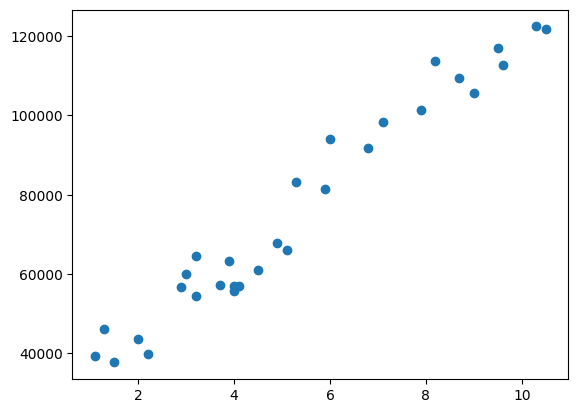

In [9]:
plt.scatter(x,y)

C:\Users\sunit\AppData\Local\Temp\ipykernel_8316\3746914587.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<AxesSubplot: xlabel='YearsExperience', ylabel='Density'>

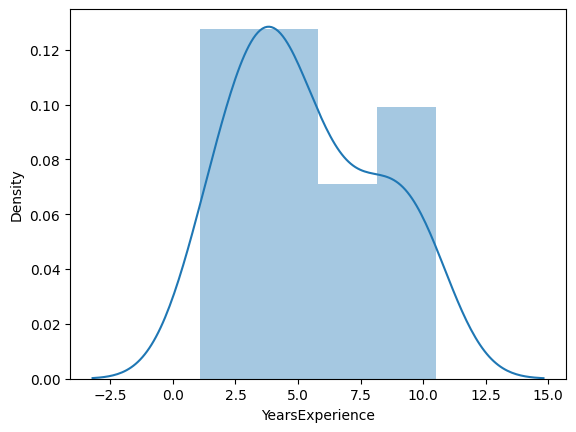

In [10]:
sns.distplot(x)

<AxesSubplot: xlabel='YearsExperience', ylabel='Density'>

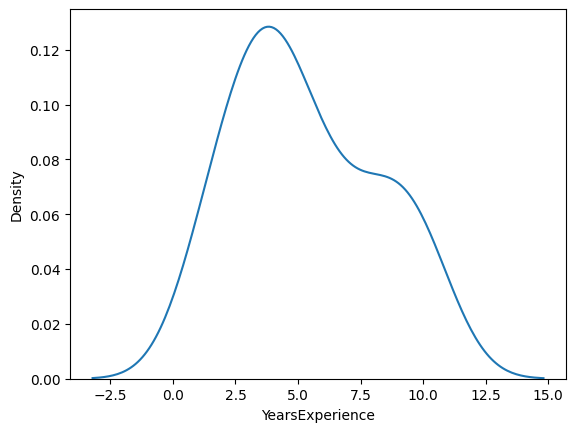

In [11]:
sns.kdeplot(x)

# Step 4: Feature Engg 

# Step 5: Feature Selection 

# Step 6: Model Training 

In [12]:
df.shape

(30, 2)

In [13]:
training_data = df.iloc[0:21]
testing_data = df.iloc[21:]
testing_data

YearsExperience    Salary
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

In [14]:
training_data

YearsExperience   Salary
0               1.1  39343.0
1               1.3  46205.0
2               1.5  37731.0
3               2.0  43525.0
4               2.2  39891.0
5               2.9  56642.0
6               3.0  60150.0
7               3.2  54445.0
8               3.2  64445.0
9               3.7  57189.0
10              3.9  63218.0
11              4.0  55794.0
12              4.0  56957.0
13              4.1  57081.0
14              4.5  61111.0
15              4.9  67938.0
16              5.1  66029.0
17              5.3  83088.0
18              5.9  81363.0
19              6.0  93940.0
20              6.8  91738.0

#### train_test_split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test, y_train,y_test = train_test_split(x,y, train_size=0.7)

In [17]:
x_train.shape

(21,)

In [18]:
x_test

13     4.1
16     5.1
26     9.5
23     8.2
5      2.9
28    10.3
17     5.3
3      2.0
29    10.5
Name: YearsExperience, dtype: float64

In [19]:
x_test.shape

(9,)

In [20]:
x_train,x_test, y_train,y_test = train_test_split(x,y, train_size=0.7,random_state=5)

In [21]:
x_train.shape

(21,)

In [22]:
x_train = pd.DataFrame(x_train)

In [23]:
x_train.shape

(21, 1)

In [24]:
y_train = pd.DataFrame(y_train)

In [25]:
# Model training 

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)   ### m & c equation of line 

LinearRegression()

In [28]:
### Model Prediction 

In [29]:
result = linear_reg.predict([[5]])
result

C:\Users\sunit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[73672.5593738]])

In [30]:
x_test = pd.DataFrame(x_test)

In [31]:
result = linear_reg.predict(x_test)
result


array([[ 64374.49262392],
       [124811.92649812],
       [103426.3729734 ],
       [110864.82637331],
       [ 82040.81944869],
       [ 63444.68594893],
       [ 41129.32574923],
       [ 65304.29929891],
       [115513.85974824]])

In [32]:
x_test['predicted_sal'] = result

In [33]:
x_test

YearsExperience  predicted_sal
11              4.0   64374.492624
29             10.5  124811.926498
23              8.2  103426.372973
25              9.0  110864.826373
18              5.9   82040.819449
10              3.9   63444.685949
2               1.5   41129.325749
13              4.1   65304.299299
26              9.5  115513.859748

In [34]:
y_test

11     55794.0
29    121872.0
23    113812.0
25    105582.0
18     81363.0
10     63218.0
2      37731.0
13     57081.0
26    116969.0
Name: Salary, dtype: float64

In [35]:
year = float(input(""))
salary = linear_reg.predict([[year]])
salary

2.3


C:\Users\sunit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[48567.77914913]])

In [37]:
with open('model.pkl','wb') as file: 
    pickle.dump(salary,file)

In [ ]:
pip install pickle